<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Unsupervised-Learning-on-Wine-Quality-Dataset" data-toc-modified-id="Unsupervised-Learning-on-Wine-Quality-Dataset-1">Unsupervised Learning on Wine Quality Dataset</a></span><ul class="toc-item"><li><span><a href="#K-Means-Cluster" data-toc-modified-id="K-Means-Cluster-1.1">K Means Cluster</a></span></li><li><span><a href="#Hierarchical-Cluster-Analysis" data-toc-modified-id="Hierarchical-Cluster-Analysis-1.2">Hierarchical Cluster Analysis</a></span></li><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-1.3">Principal Component Analysis</a></span></li></ul></li></ul></div>

# Unsupervised Learning on Wine Quality Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

pd.options.display.float_format = '{:,.3f}'.format

In [2]:
# load data

red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", 
                  sep = ';')

In [55]:
# Preprocess data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(red)

X = pd.DataFrame(scaler.transform(red), index=red.index, columns=red.columns)

In [13]:
# Before scaling
red.iloc[0:2,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5


In [14]:
# After scaling
X.iloc[0:2,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528,0.962,-1.391,-0.453,-0.244,-0.466,-0.379,0.558,1.289,-0.579,-0.960,-0.788
1,-0.299,1.967,-1.391,0.043,0.224,0.873,0.624,0.028,-0.720,0.129,-0.585,-0.788


## K Means Cluster

Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)

Text(0.5,1,'Elbow curve')

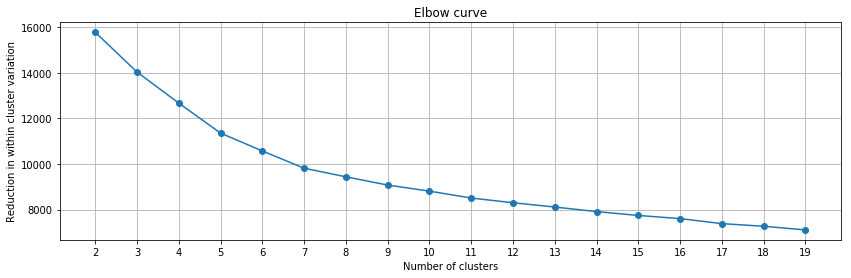

In [15]:
# Use Elbow curve to help select the number of clusters
from sklearn.cluster import KMeans

within_cluster_variance = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state = 0)
    kmeans.fit(X)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(14, 4))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')
plt.xticks(np.arange(2, 20, step=1))
plt.title('Elbow curve')  


In [59]:
from sklearn.cluster import KMeans
km7 = KMeans(n_clusters=7, n_init=20, random_state=10)
km7.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [60]:
X['cluster7'] = km7.labels_

display(X.groupby('cluster7').mean().sort_values(['quality'], ascending = False).set_index('quality'))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
1.034,0.269,-0.994,0.760,-0.100,-0.239,-0.341,-0.537,-0.505,-0.257,0.463,1.016
0.501,-1.082,0.340,-0.903,-0.271,-0.414,0.276,-0.162,-1.330,1.148,-0.125,1.174
0.090,1.671,-0.553,1.219,0.119,0.052,-0.487,-0.432,1.205,-0.990,0.223,-0.141
-0.023,-0.086,-0.035,0.415,4.962,0.296,1.750,1.696,1.225,-0.325,-0.024,-0.364
-0.361,0.082,0.018,1.144,-0.399,5.605,-0.070,0.474,0.186,-1.687,3.721,-0.883
-0.425,-0.129,0.024,0.059,-0.021,-0.039,1.000,1.233,0.199,-0.094,-0.171,-0.573
-0.510,-0.429,0.668,-0.783,-0.198,-0.049,-0.486,-0.413,0.008,0.342,-0.417,-0.507


In [62]:
X.loc[:,['cluster7', 'quality']].groupby(['cluster7']).aggregate([np.mean, np.size])

quality        
            mean    size
cluster7                
0         -0.023  34.000
1         -0.510 491.000
2          0.501 199.000
3         -0.361  29.000
4          1.034 274.000
5          0.090 237.000
6         -0.425 335.000

**Variables that cluster with higher values of wine quality.**

Low density and high alchol

**Variables that cluster with lower values of wine quality.**

high density and low alcohol

**Characteristics that are most important according to this analysis?**

Density and alcohol

## Hierarchical Cluster Analysis 

Use complete linkage and the same number of groups (clusters) that you found to be the most meaningful in question 1.

In [80]:
X = pd.DataFrame(scaler.transform(red), index=red.index, columns=red.columns)

In [49]:
 # Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, complete

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances 
# bridged when performing agglomerative clustering
linkage_array = complete(X)

Text(0,0.5,'Cluster distance')

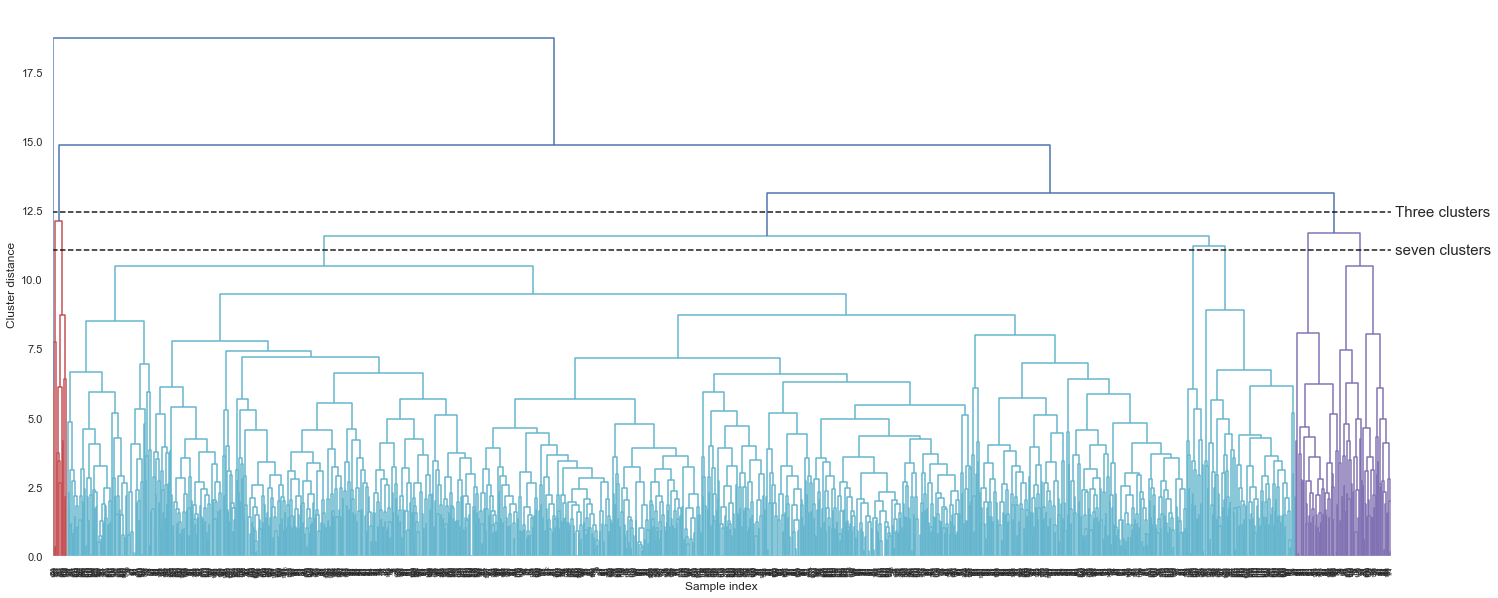

In [61]:
# Now we plot the dendrogram for the linkage_array containing the distances # between clusters
fig = plt.figure(figsize=(24, 10))
dendrogram(linkage_array)
# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [12.45, 12.45], '--', c='k')
ax.plot(bounds, [11.05, 11.05], '--', c='k')

ax.text(bounds[1], 12.45, ' Three clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 11.05, ' seven clusters', va='center', fontdict={'size': 15})

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")


In [81]:
from sklearn.cluster import AgglomerativeClustering

hc7 = AgglomerativeClustering(n_clusters=7,
                             affinity='euclidean', 
                             linkage='complete')
hc7.fit(X) 


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=7, pooling_func=<function mean at 0x10e4a5950>)

In [82]:
X['hc7'] = hc7.labels_



display(X.groupby('hc7').mean().sort_values(['quality'], ascending = False).set_index('quality'))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
1.277,-0.624,-1.291,1.364,5.294,-0.676,3.168,5.956,-1.185,-1.260,-0.815,1.136
0.669,2.483,-0.657,1.593,0.193,-0.056,-0.472,-0.452,1.468,-1.626,0.646,0.131
0.165,-1.098,0.431,-0.722,-0.284,-0.402,-0.181,-0.186,-1.592,1.127,-0.297,1.529
0.070,0.285,-0.598,0.631,6.833,0.639,0.983,0.505,1.903,-0.501,0.115,-0.599
-0.027,0.010,-0.003,-0.029,-0.043,-0.108,0.023,-0.004,0.070,0.012,-0.125,-0.115
-0.336,0.012,-0.101,0.528,-0.328,2.707,-0.106,0.430,0.260,-1.022,2.585,-0.725
-1.407,0.075,-0.351,3.127,0.043,11.116,0.394,0.320,0.770,-2.664,5.735,-0.960


In [79]:
X.loc[:,['hc7', 'quality']].groupby(['hc7']).aggregate([np.mean, np.size])


quality          
       mean      size
hc7                  
0     0.165   130.000
1     0.070    13.000
2    -0.336    63.000
3    -1.407     2.000
4     0.669    51.000
5     1.277     3.000
6    -0.027 1,337.000

**Variables that cluster with higher values of wine quality.**

High alcohol, low or high fixed acidity

**Variables that cluster with lower values of wine quality.**

Low alcohol, medium fixed acidity

**Characteristics that are most important according to this analysis?** 

Alcohol, fixed acidity

**Compare Hierarchical clustering with k-means clustering?**

Heierarchical do not differentiate density, but fixed acidity. Alcohol remains the most clear sign of quality.

## Principal Component Analysis

Use Principal Components Analysis to reduce the dimensions of your data. 

In [85]:
from sklearn.decomposition import PCA
# How many PCA returns
pca = PCA(n_components=2)
X = pd.DataFrame(scaler.transform(red), index=red.index, columns=red.columns)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**How much of the variation in your data is explained by the first two principal components. **

About 45%

In [86]:
print(pca.explained_variance_ratio_) 

[0.26009731 0.1868235 ]


**How I use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?**

PCA can reduce the dimensions of the originial data, give us a simpler representation of the training data. 

Use the first two components we can reduce the data to 2 dimension, which in convenient for visualization, though only contains 45% variance.

Use the simpler data to learn other variable can reduce the computational cost and learning time.


In [87]:
# create X data with single pca vector
X_pca = pca.transform(X) 